<a href="https://colab.research.google.com/github/Raghav-Aggarwal-20/Projects-/blob/main/Amazon_Product_Reviews_Sentiment_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
!pip install nltk
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiments = SentimentIntensityAnalyzer()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [2]:
data = pd.read_csv("/content/Reviews.csv", encoding='utf-8')
print(data.head())

   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1 

In [3]:
print(data.describe())

               Id  HelpfulnessNumerator  HelpfulnessDenominator        Score  \
count  8187.00000           8187.000000             8187.000000  8187.000000   
mean   4094.00000              1.551484                1.995725     4.150360   
std    2363.52766              5.132082                5.739210     1.320029   
min       1.00000              0.000000                0.000000     1.000000   
25%    2047.50000              0.000000                0.000000     4.000000   
50%    4094.00000              0.000000                1.000000     5.000000   
75%    6140.50000              2.000000                2.000000     5.000000   
max    8187.00000            187.000000              216.000000     5.000000   

               Time  
count  8.187000e+03  
mean   1.292730e+09  
std    4.918010e+07  
min    9.617184e+08  
25%    1.263686e+09  
50%    1.307923e+09  
75%    1.329869e+09  
max    1.351210e+09  


In [4]:
print(data.isnull().sum())

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64


In [5]:
#As this dataset is very large, it contains some missing values, so let’s remove all the rows containing the missing values:
data = data.dropna()

##Sentiment Analysis of Amazon Product Reviews

The Score column of this dataset contains the ratings that customers have given to the product based on their experience with the product. So let’s take a look at the rating breakdown to see how most customers rate the products they buy from Amazon:

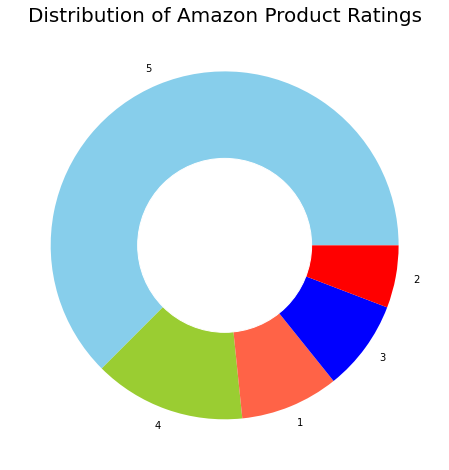

In [6]:
ratings = data["Score"].value_counts()
numbers = ratings.index
quantity = ratings.values

custom_colors = ["skyblue", "yellowgreen", 'tomato', "blue", "red"]
plt.figure(figsize=(10, 8))
plt.pie(quantity, labels=numbers, colors=custom_colors)
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Distribution of Amazon Product Ratings", fontsize=20)
plt.show()

According to the figure above, more than half of people rated products they bought from Amazon with 5 stars, which is good. Now, I’m going to add three more columns to this dataset as Positive, Negative, and Neutral by calculating the sentiment scores of the customer reviews mentioned in the Text column of the dataset:

In [7]:
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["Text"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["Text"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["Text"]]
print(data.head())

   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  \
0  Good Quality Dog Food  I have bought several of the Vitality canned d...   


Now let’s see how most people rated the products they bought from Amazon:

In [8]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")
sentiment_score(x, y, z)

Neutral 🙂 


most people are neutral when submitting their experiences with the products they have purchased from Amazon. Now let’s see the total of all sentiment scores:

In [9]:
print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Positive:  1563.2760000000037
Negative:  341.0640000000002
Neutral:  6282.633000000027


So we can say that most of the reviews of the products available on Amazon are positive, as the total sentiment scores of Positive and Neural are much higher than Negative scores.